# Clustering

## Problem Statement

Students have to evaluate a lot of factors before taking a decision to join a university for their higher education requirements.
The objective of this project is to simplify the process of applying for appropriate universities which are of similar nature.

`CRISP-ML(Q)` process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

**Objective(s):** Maximize the convience of admission process

**Constraints:** Minimize the brain drain


**Success Criteria**

- **Business Success Criteria**: Reduce the application process time from anywhere between 20% to 40%

- **ML Success Criteria**: Achieve Silhoutte coefficient of atleast 0.6

- **Economic Success Criteria**: US Higher education department will see an increase in revenues by atleast 30%

**Proposed Plan:**
Grouping the available universities will allow to understand the characteristics of each group.

## Data Collection

Data:
   The university details are obtained from the US Higher Education Body and is publicly available for students to access.

Data Dictionary:
- Dataset contains 25 university details
- 7 features are recorded for each university

Description:
- Univ - University Name
- State - Location (state) of the university
- SAT - Cutoff SAT score for eligibility
- Top10 - % of students who ranked in top 10 in their previous academics
- Accept - % of students admitted to the universities
- SFRatio - Student to Faculty ratio
- Expenses - Overall cost in USD
- GradRate - % of students who graduate

**Importing required packages**

In [ ]:
import pandas as pd

**Import the data**

In [ ]:
df = pd.read_excel("/content/University_Clustering.xlsx")
df

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0
5,6,Dartmouth,NH,1340.0,89,23,10.0,32162,95.0
6,7,Duke,NC,1315.0,90,30,12.0,31585,95.0
7,8,Georgetown,DC,NaN,74,24,12.0,20126,92.0
8,9,Harvard,MA,1400.0,91,14,11.0,39525,97.0
9,10,JohnsHopkins,MD,1305.0,75,44,7.0,58691,87.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UnivID    25 non-null     int64  
 1   Univ      25 non-null     object 
 2   State     25 non-null     object 
 3   SAT       24 non-null     float64
 4   Top10     25 non-null     int64  
 5   Accept    25 non-null     int64  
 6   SFRatio   24 non-null     float64
 7   Expenses  25 non-null     int64  
 8   GradRate  24 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ KB


## EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

***Descriptive Statistics and Data Distribution Function***

In [ ]:
df.describe()

,UnivID,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
mean,13.000000,1266.916667,76.480000,39.200000,12.708333,27388.000000,86.666667
std,7.359801,110.663578,19.433905,19.727308,4.154402,14424.883165,9.248580
min,1.000000,1005.000000,28.000000,14.000000,6.000000,8704.000000,67.000000
25%,7.000000,1236.250000,74.000000,24.000000,10.750000,15140.000000,80.750000
50%,13.000000,1287.500000,81.000000,36.000000,12.000000,27553.000000,90.000000
75%,19.000000,1345.000000,90.000000,50.000000,14.250000,34870.000000,94.000000
max,25.000000,1415.000000,100.000000,90.000000,25.000000,63575.000000,97.000000


## Data Preprocessing

**Cleaning Unwanted columns**

UnivID is an identity to each university. Analytically it does not have any value (Nominal data). We can safely ignore the ID column by droping the column.

In [ ]:
df.drop(['UnivID'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       24 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   24 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  24 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


## Automated Libraries

In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 45.7 MB/s eta 0:00:00


In [ ]:
# AutoEDA
import sweetviz
my_report = sweetviz.analyze([df, "df"])

my_report.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 88.9 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62567 sha256=4a55c6e5ccf63a4561e76da677

In [ ]:
# D-Tale
########

# pip install dtale
import dtale

d = dtale.show(df)
d.open_browser()

In [ ]:
! pip install py-AutoClean

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.9 MB/s eta 0:00:00
  Created wheel for py-AutoClean: filename=py_AutoClean-1.1.3-py3-none-any.whl size=10273 sha256=bf24d04ed960861f8df3f883720662975047b1599c6402eaed7b47f0a08e05be
  Stored in directory: /root/.cache/pip/wheels/b5/13/2b/3a5fdae6161f870ea670f2bf3a7157f8a5b38b166282b6bc92
Successfully built py-AutoClean


## Data Preprocessing

In [ ]:
# AutoPreprocessing and Cleaning
from AutoClean import AutoClean
clean_pipeline = AutoClean(df.iloc[:, 1:], mode = 'manual', missing_num = 'auto',
                           outliers = 'winz', encode_categ = 'auto')

# Missing values = 'auto': AutoClean first attempts to predict the missing values with Linear Regression
# outliers = 'winz': outliers are handled using winzorization
# encode_categ = 'auto': Label encoding performed (if more than 10 categories are present)

df_clean = clean_pipeline.output
df_clean.head()

AutoClean process completed in 0.205737 seconds
Logfile saved to: /content/autoclean.log


,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,State_lab
0,Brown,RI,1310,89,22,13,22704,94,13
1,CalTech,CA,1415,100,25,6,63575,81,0
2,CMU,PA,1260,62,59,9,25026,72,12
3,Columbia,NY,1310,76,24,12,31510,91,11
4,Cornell,NY,1280,83,33,13,21864,90,11


#### Drawback with this approach: If there are more than 10 categories, then Autoclean performs label encoding.

In [ ]:
df_clean.drop(['State'], axis = 1, inplace = True)

In [ ]:
df_clean.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,State_lab
0,Brown,1310,89,22,13,22704,94,13
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,12
3,Columbia,1310,76,24,12,31510,91,11
4,Cornell,1280,83,33,13,21864,90,11


## Normalization/MinMax Scaler - To address the scale differences

### Python Pipelines

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Univ       25 non-null     object
 1   SAT        25 non-null     Int64 
 2   Top10      25 non-null     Int64 
 3   Accept     25 non-null     Int64 
 4   SFRatio    25 non-null     Int64 
 5   Expenses   25 non-null     Int64 
 6   GradRate   25 non-null     Int64 
 7   State_lab  25 non-null     Int64 
dtypes: Int64(7), object(1)
memory usage: 1.9+ KB


In [ ]:
cols = list(df_clean.columns)
print(cols)

pipe1 = make_pipeline(MinMaxScaler())

['Univ', 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate', 'State_lab']


In [23]:
df_pipelined = pd.DataFrame(pipe1.fit_transform(df_clean.iloc[:, 1:]), columns = cols[1:], index = df_clean.index)
df_pipelined.head()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate,State_lab
0,0.676923,0.78,0.106667,0.500000,0.255144,0.900000,0.8125
1,1.000000,1.00,0.146667,0.000000,1.000000,0.466667,0.0000
2,0.523077,0.24,0.600000,0.214286,0.297461,0.166667,0.7500
3,0.676923,0.52,0.133333,0.428571,0.415629,0.800000,0.6875
4,0.584615,0.66,0.253333,0.500000,0.239835,0.766667,0.6875


In [24]:
df_pipelined.describe() # scale is normalized to min = 0; max = 1

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,State_lab
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.559508,0.565600,0.335467,0.457143,0.340508,0.661333,0.457500
std,0.303335,0.312811,0.261610,0.254216,0.262887,0.303175,0.316495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461538,0.480000,0.133333,0.285714,0.117293,0.466667,0.187500
50%,0.600000,0.620000,0.293333,0.428571,0.343515,0.766667,0.437500
75%,0.769231,0.800000,0.480000,0.571429,0.476864,0.900000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# CLUSTERING MODEL BUILDING

### Hierarchical Clustering - Agglomerative Clustering

In [25]:
# Libraries for creating dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

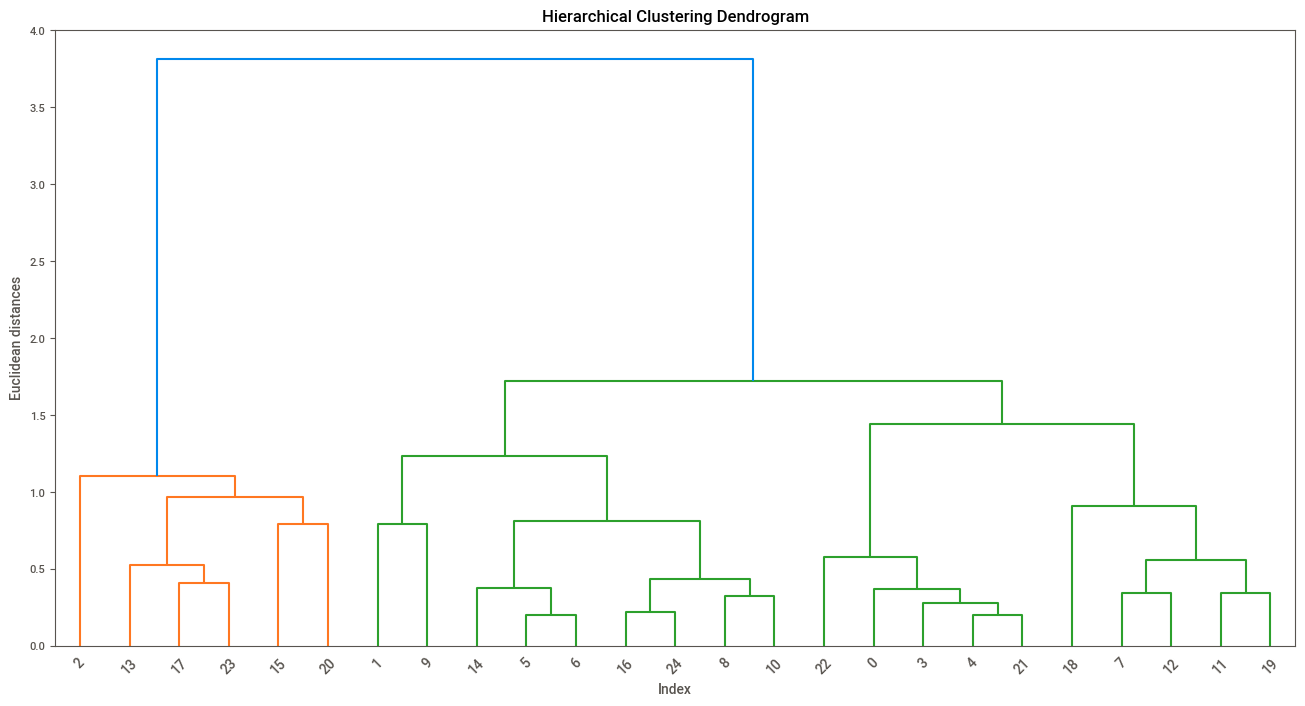

In [27]:
plt.figure(1, figsize = (16, 8))
tree_plot = dendrogram(linkage(df_pipelined, method  = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [28]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

y_hc1 = hc1.fit_predict(df_pipelined)
y_hc1

array([2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2,
       2, 1, 0])

In [29]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

y_hc2 = hc2.fit_predict(df_pipelined)
y_hc2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0,
       0, 1, 0])

In [30]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')

y_hc3 = hc3.fit_predict(df_pipelined)
y_hc3

array([0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
hc1.labels_   # Referring to the results obtained from linkage = 'complete' method

array([2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2,
       2, 1, 0], dtype=int64)

In [31]:
cluster_labels = pd.Series(hc1.labels_)

In [32]:
df_clust = pd.concat([cluster_labels, df_clean], axis = 1) # We are combining data

df_clust

,0,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,State_lab
0,2,Brown,1310,89,22,13,22704,94,13
1,0,CalTech,1415,100,25,6,63575,81,0
2,2,CMU,1260,62,59,9,25026,72,12
3,2,Columbia,1310,76,24,12,31510,91,11
4,2,Cornell,1280,83,33,13,21864,90,11
5,0,Dartmouth,1340,89,23,10,32162,95,9
6,0,Duke,1315,90,30,12,31585,95,8
7,0,Georgetown,1276,74,24,12,20126,92,2
8,0,Harvard,1400,91,14,11,39525,97,5
9,0,JohnsHopkins,1305,75,44,7,58691,87,6


In [ ]:
# df_clust = pd.concat([cluster_labels, df], axis = 1) # Original data with missing data

# df_clust.head()

In [ ]:
df_clust.columns

Index([0, 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate',
       'State_lab'],
      dtype='object')

In [33]:
df_clust = df_clust.rename(columns = {0: 'cluster'})
df_clust.head()

,cluster,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,State_lab
0,2,Brown,1310,89,22,13,22704,94,13
1,0,CalTech,1415,100,25,6,63575,81,0
2,2,CMU,1260,62,59,9,25026,72,12
3,2,Columbia,1310,76,24,12,31510,91,11
4,2,Cornell,1280,83,33,13,21864,90,11


# Clusters Evaluation

**Silhouette coefficient:**  

Silhouette coefficient is a Metric, which is used for calculating goodness of clustering technique and the value ranges between (-1 to +1). It tells how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

A score of 1 denotes the best meaning that the data point is very compact within the cluster to which it belongs and far away from the other clusters.

Values near 0 denote overlapping clusters.


In [34]:
from sklearn import metrics

In [35]:
metrics.silhouette_score(df_pipelined, cluster_labels)

0.24960092059613592

**Calinski Harabasz:**

Higher value of CH index means cluster are well separated. There is no thumb rule which is acceptable cut-off value.

In [36]:
metrics.calinski_harabasz_score(df_pipelined, cluster_labels)

16.982453333832858

**Davies-Bouldin Index:**

Unlike the previous two metrics, this score measures the similarity of clusters.

The lower the score the better the separation between your clusters.


In [37]:
metrics.davies_bouldin_score(df_pipelined, cluster_labels)

1.2795607107844207

## Cluster Evaluation Library

In [38]:
!pip install clusteval

# Refer to link: https://pypi.org/project/clusteval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.1 MB/s eta 0:00:00


In [39]:
from clusteval import clusteval
import numpy as np

# Silhouette cluster evaluation.
ce = clusteval(evaluate='silhouette')

In [40]:
df_array = np.array(df_pipelined)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:00<00:00, 104.03it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


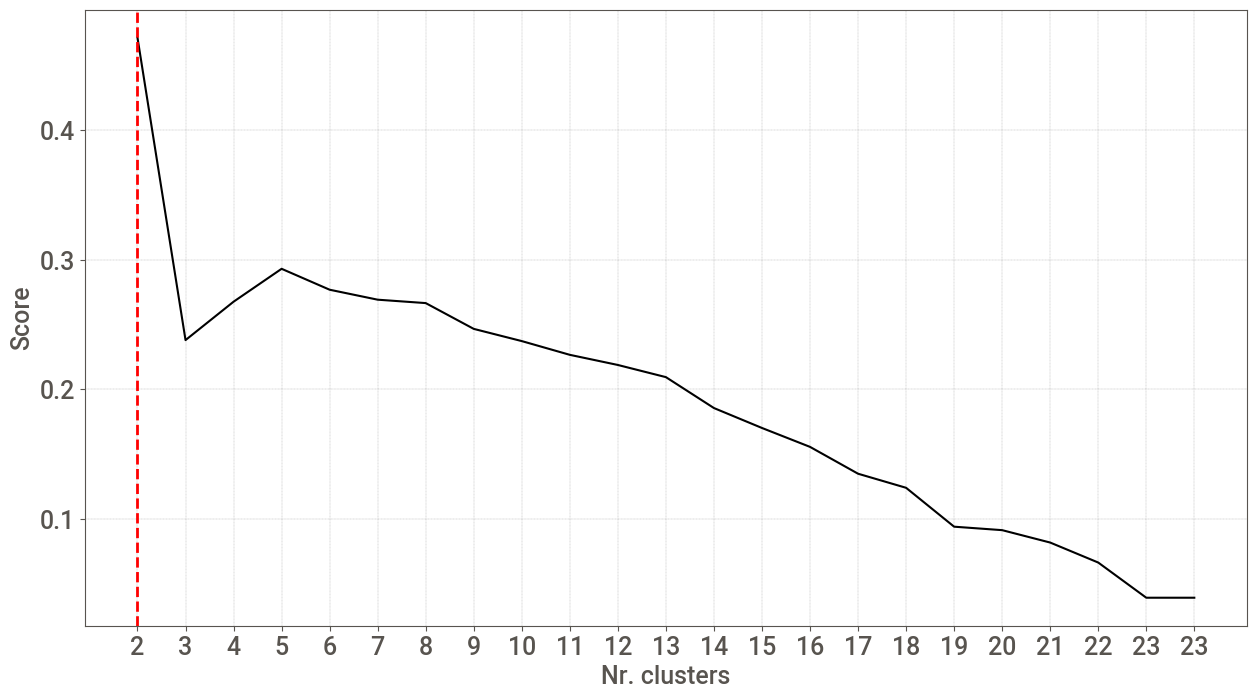

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [41]:
# Fit
ce.fit(df_array)

# Plot
ce.plot()

In [42]:
## Using the report from clusteval library building 2 clusters
# Fit using agglomerative with metric: euclidean, and linkage: ward


# Applying AgglomerativeClustering with = 2 as clusters

hc_2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

y_hc_2 = hc_2.fit_predict(df_pipelined)
y_hc_2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0])

In [43]:
hc_2.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0])

In [44]:
cluster_labels2 = pd.Series(hc_2.labels_)

In [46]:
df_2clust = pd.concat([cluster_labels2, df_clean], axis = 1) # Imputed data

df_2clust

,0,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,State_lab
0,0,Brown,1310,89,22,13,22704,94,13
1,0,CalTech,1415,100,25,6,63575,81,0
2,1,CMU,1260,62,59,9,25026,72,12
3,0,Columbia,1310,76,24,12,31510,91,11
4,0,Cornell,1280,83,33,13,21864,90,11
5,0,Dartmouth,1340,89,23,10,32162,95,9
6,0,Duke,1315,90,30,12,31585,95,8
7,0,Georgetown,1276,74,24,12,20126,92,2
8,0,Harvard,1400,91,14,11,39525,97,5
9,0,JohnsHopkins,1305,75,44,7,58691,87,6


In [47]:
df_2clust = df_2clust.rename(columns = {0:'cluster'})
df_2clust.head()

,cluster,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,State_lab
0,0,Brown,1310,89,22,13,22704,94,13
1,0,CalTech,1415,100,25,6,63575,81,0
2,1,CMU,1260,62,59,9,25026,72,12
3,0,Columbia,1310,76,24,12,31510,91,11
4,0,Cornell,1280,83,33,13,21864,90,11


In [ ]:
# Aggregate using mean of each cluster
df_2clust.iloc[:, 1:7].groupby(df_2clust.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1315.631579,85.789474,30.157895,11.157895,31810.105263,90.947368
1,1133.333333,54.5,67.666667,16.166667,13384.666667,74.0


In [48]:
df_2clust.to_csv('University.csv', encoding = 'utf-8')

import os
os.getcwd()

'/content'